In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import warnings
from statsbombpy.api_client import NoAuthWarning
warnings.simplefilter('ignore', NoAuthWarning)
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl

api = StatsBombLoader(getter="remote", creds={"user": "", "passwd": ""})

g = 3795506
df_teams = api.teams(game_id=g)
df_players = api.players(game_id=g)
df_events = api.events(game_id=g, load_360=True)

teams = list(df_events['team_name'].unique())
teams_id = list(df_events['team_id'].unique())
print(teams)
print(teams_id)

draw_id = 0
types = ["Block", "Interception", "Clearance", "Ball Recovery"] # Colletion of plotted events (Remember everything is plotted with the same marker)
df = df_events[df_events["type_name"].isin(types)]
df = df[df["position_name"] != "Goalkeeper"] # Sometimes it may be useful to ignore the keeper
# df = df[df["possession_team_id"] == teams_id[abs(draw_id-1)]] # Consider only event type when other team has the ball
df = df[df["team_id"] == teams_id[draw_id]].reset_index(drop=True) # Consider only one of the two teams

['Italy', 'England']
[914, 768]


In [3]:
df_events.type_name.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Duel', 'Block', 'Interception', 'Clearance', 'Shot',
       'Goal Keeper', 'Dribble', 'Foul Committed', 'Ball Recovery',
       'Dispossessed', 'Foul Won', 'Miscontrol', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Half End',
       'Substitution', 'Tactical Shift', 'Referee Ball-Drop'],
      dtype=object)

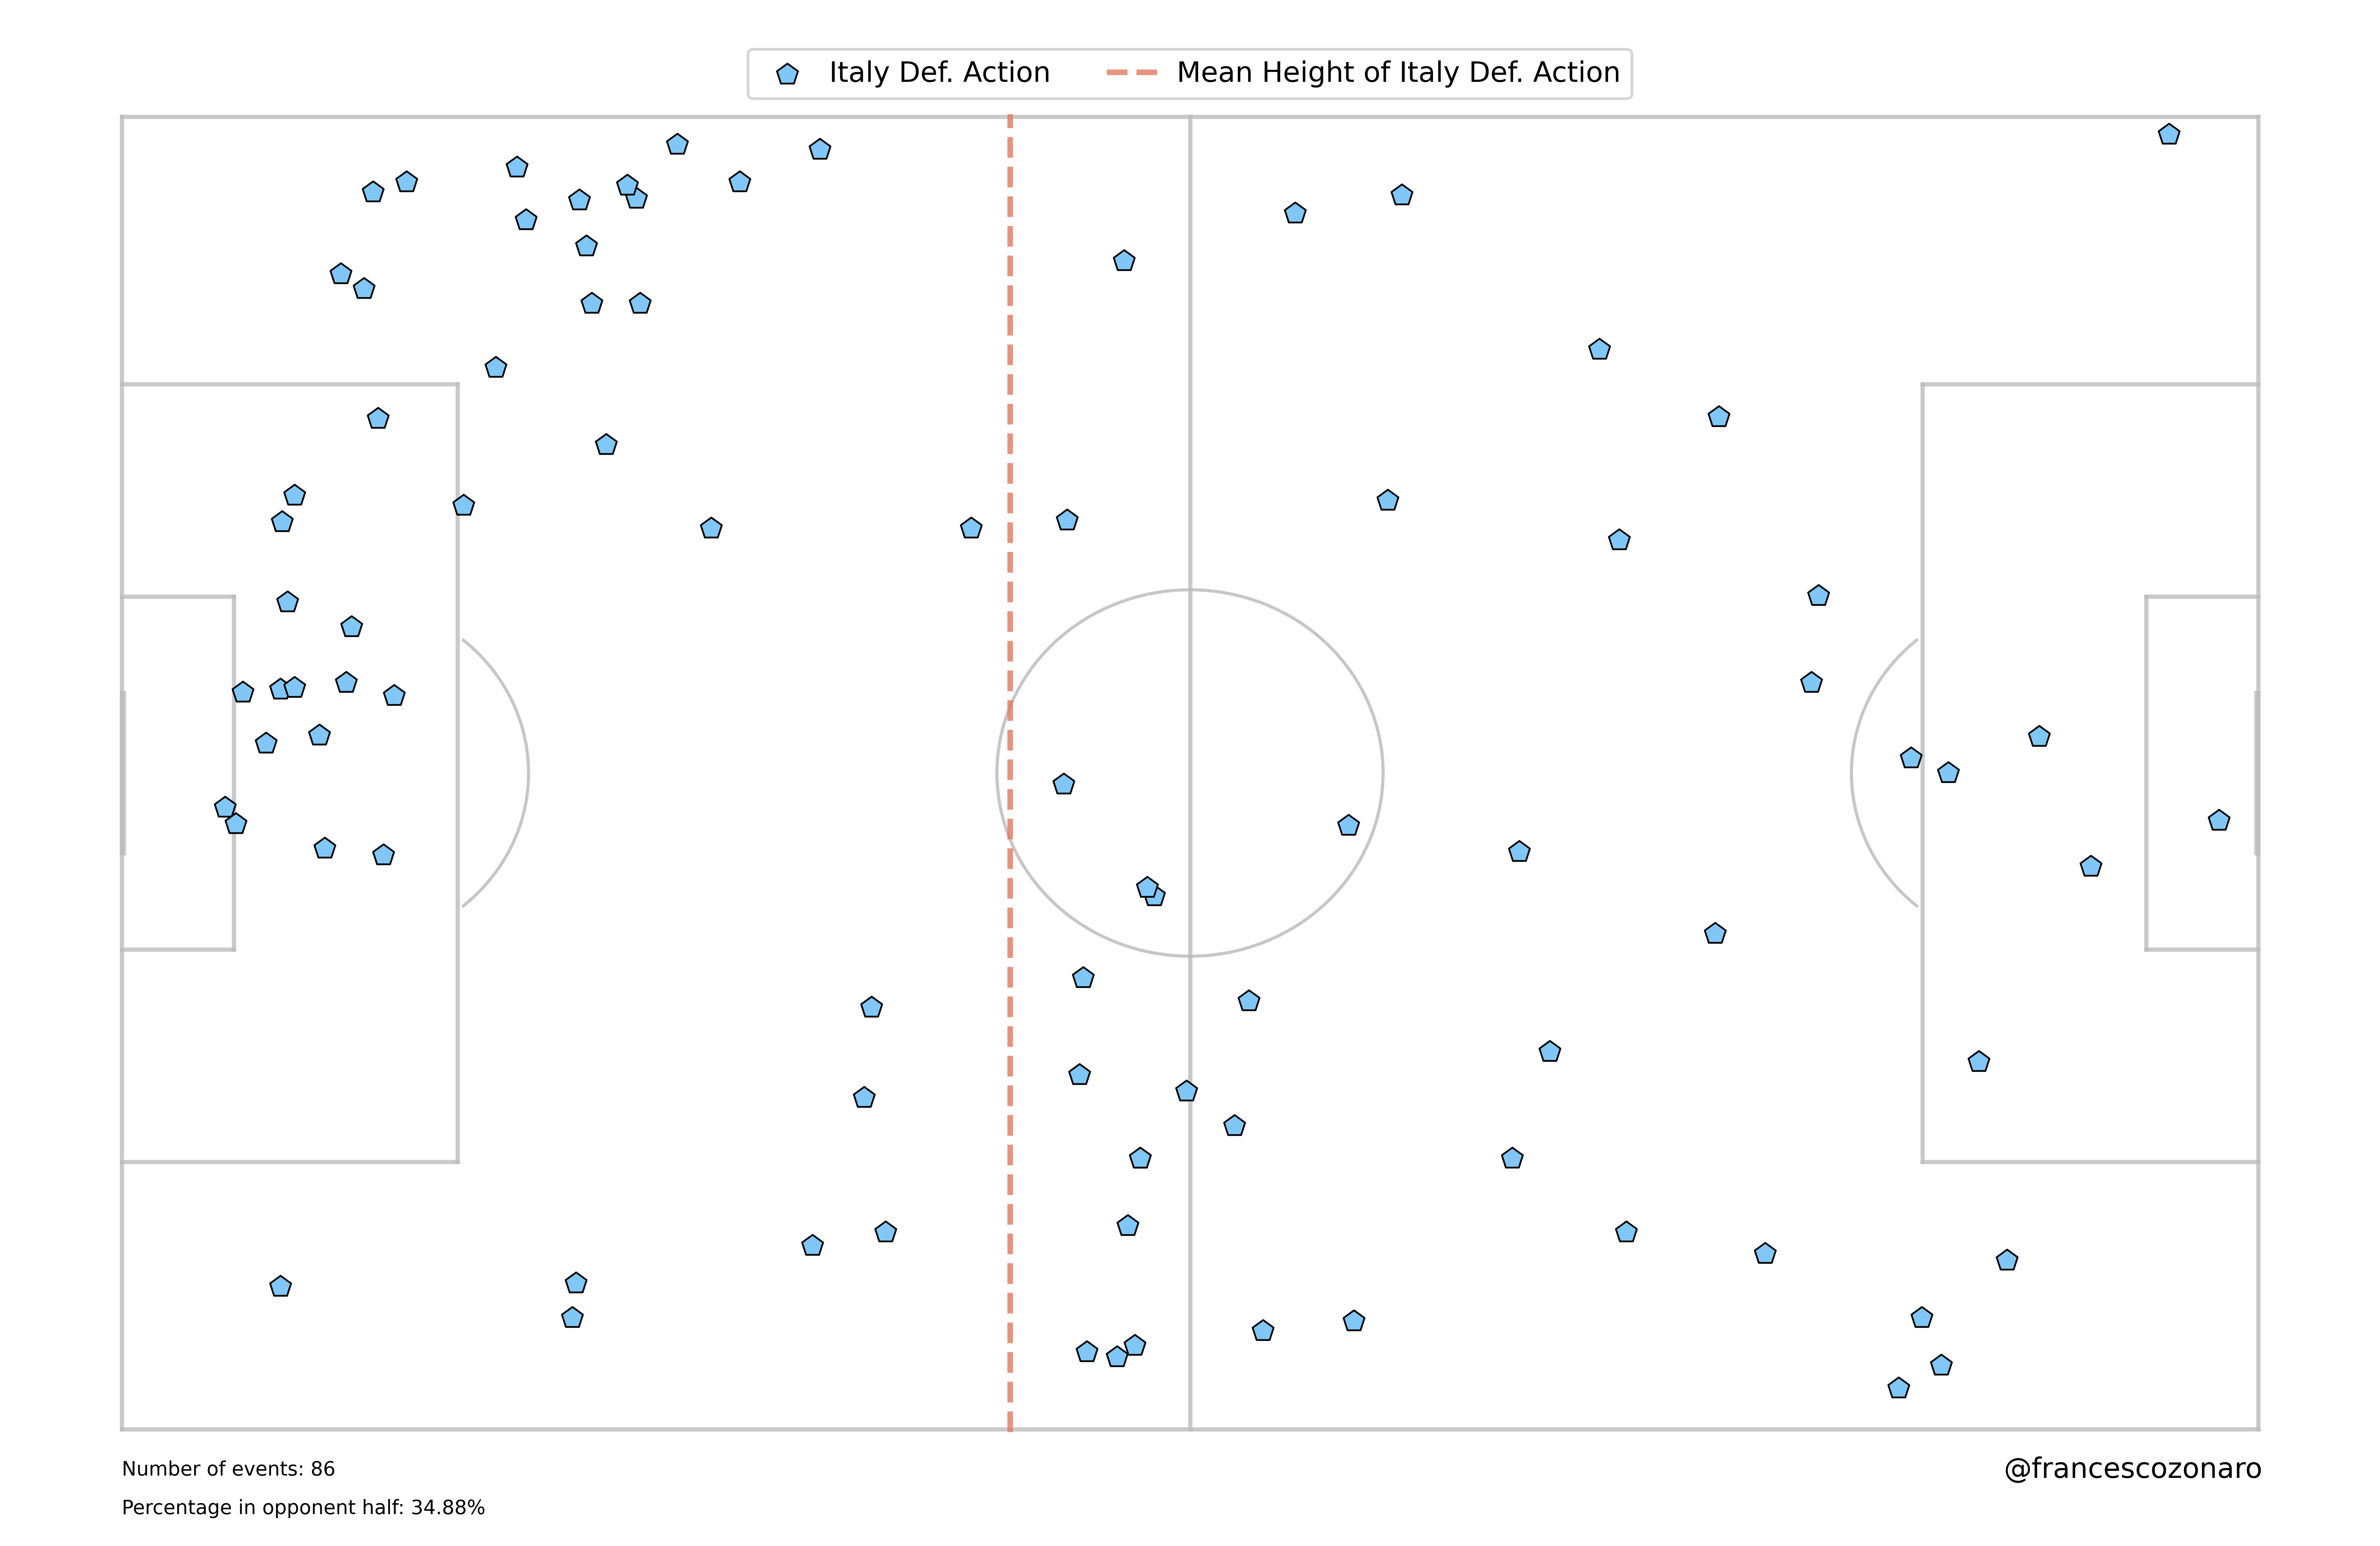

In [4]:
import statsbombplot as sbp

sbp.events.draw_event_type_scatter(df, 
                                   filename=f"defAction{teams[draw_id].split()[0]}", 
                                   event_type=f"{teams[draw_id]} Def. Action",
                                   marker_shape='p',
                                   marker_color=(0.5, 0.78, 0.97, 1))